<a href="https://colab.research.google.com/github/ZakariaBENCHEIKH/deep_learning_Projects/blob/master/GlassesDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Populating the interactive namespace from numpy and matplotlib
Shape of the image (216580,)


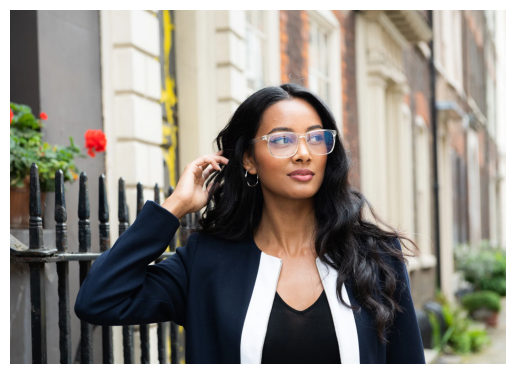

Shape of the image (47785,)


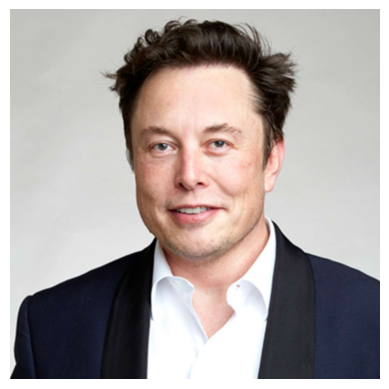

In [29]:
import cv2
import numpy as np
import requests
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sys
import datetime
from tensorflow import keras
from tensorflow.keras.models import Model
import tensorflow as tf


%pylab inline

url_glasses = r'https://github.com/ZakariaBENCHEIKH/deep_learning_Projects/blob/master/glasses.png?raw=true'
resp = requests.get(url_glasses, stream=True).raw
image_array_glasses = np.asarray(bytearray(resp.read()), dtype="uint8")
print(f'Shape of the image {image_array_glasses.shape}')
image_glasses = cv2.imdecode(image_array_glasses, cv2.IMREAD_COLOR)
plt.axis('off')
plt.imshow(cv2.cvtColor(image_glasses, cv2.COLOR_BGR2RGB)) #opencv if BGR color, matplotlib usr RGB so we need to switch otherwise the pikachu will be blue ... O:)
plt.show()

url_withoutGlasses = r'https://github.com/ZakariaBENCHEIKH/deep_learning_Projects/blob/master/withoutGlasses.png?raw=true'
resp = requests.get(url_withoutGlasses, stream=True).raw
image_array_withoutGlasses = np.asarray(bytearray(resp.read()), dtype="uint8")
print(f'Shape of the image {image_array_withoutGlasses.shape}')
image_withoutGlasses = cv2.imdecode(image_array_withoutGlasses, cv2.IMREAD_COLOR)
plt.axis('off')
plt.imshow(cv2.cvtColor(image_withoutGlasses, cv2.COLOR_BGR2RGB))
plt.show()

(40, 40, 3)
(40, 40)
000  000  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  000  000  000  000  000  255  000  255  255  255  255  255  255  
000  000  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  000  255  000  255  000  255  000  255  255  255  255  255  255  
000  000  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  000  255  255  255  000  000  255  255  255  255  255  255  255  
000  000  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  000  255  255  255  255  000  255  255  255  255  255  255  255  
000  000  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  000  255  255  255  255  000  255  255  255  255  000  255  255  

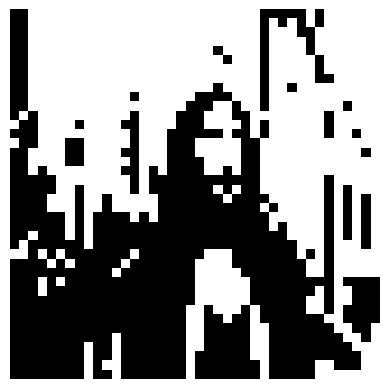

In [32]:
res = cv2.resize(image_glasses , dsize=(40,40), interpolation=cv2.INTER_CUBIC)
print(res.shape)
res = cv2.cvtColor(res,cv2.COLOR_RGB2GRAY) #TO 3D to 1D
print(res.shape)
res = cv2.threshold(res, 127, 255, cv2.THRESH_BINARY)[1]
d = res
for row in range(0,40):
    for col in range(0,40):
        print('%03d ' %d[row][col],end=' ')
    print('')
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

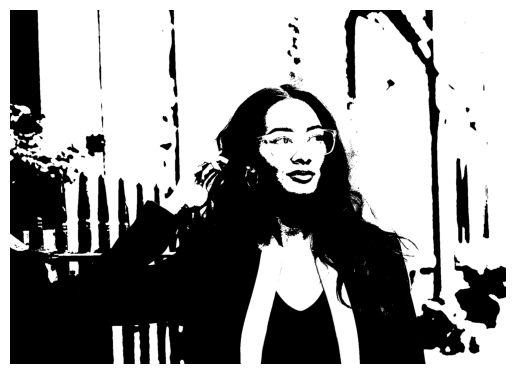

In [33]:
img_bw = cv2.imdecode(image_array_glasses, cv2.IMREAD_GRAYSCALE) #decoder et charger image au niveau de gris
(thresh, img_bw) = cv2.threshold(img_bw, 127, 255, cv2.THRESH_BINARY) #applique un seuillage binaire sur l'image en niveaux de gris img_bw à l'aide de cv2.threshold(). Le seuil est fixé à 127 (thresh = seuil calculer)
plt.axis('off') # Cette ligne de code désactive l'affichage des axes dans la figure
plt.imshow(cv2.cvtColor(img_bw, cv2.COLOR_BGR2RGB))

[[-10   0  10]
 [-10   0  10]
 [-10   0  10]]


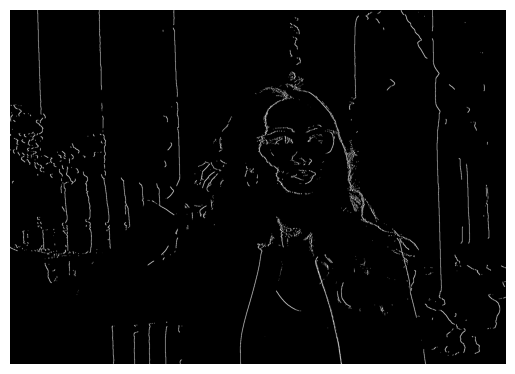

In [34]:
#defining a vertical edge detection kernel
kernel = np.matrix([[-10,0,10],[-10,0,10],[-10,0,10]])
print(kernel)
img_1 = cv2.filter2D(img_bw, -1, kernel)
plt.axis('off')
plt.imshow(cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB))

In [4]:
import pathlib
import os
data_dir = tf.keras.utils.get_file(
    "dataset.zip",
    "https://github.com/ZakariaBENCHEIKH/deep_learning_Projects/blob/master/dataset.zip?raw=true",
    extract=False)

import zipfile
with zipfile.ZipFile(data_dir, 'r') as zip_ref:
    zip_ref.extractall('/content/datasets')

data_dir = pathlib.Path('/content/datasets/dataset')
print(data_dir)
print(os.path.abspath(data_dir))

/content/datasets/dataset
/content/datasets/dataset


In [5]:
image_count = len(list(data_dir.glob('*/*')))
print(image_count)

192


In [6]:
batch_size = 3
img_height = 200
img_width = 200

train_data = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  )

val_data = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = val_data.class_names
print(class_names)

Found 192 files belonging to 2 classes.
Using 154 files for training.
Found 192 files belonging to 2 classes.
Using 38 files for validation.
['glasses', 'withoutGlasses']


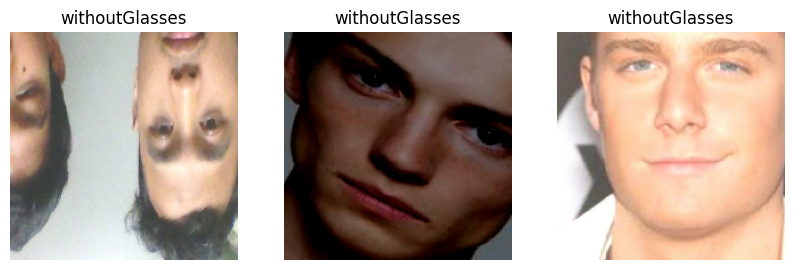

In [13]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
  for i in range(3):
    ax = plt.subplot(1, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [15]:
from tensorflow import keras
from tensorflow.keras import layers

num_classes = 2

model = tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(128,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(16,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'],)

logdir="logs"

tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir,histogram_freq=1, write_images=logdir,
                                                   embeddings_data=train_data)

model.fit(
    train_data,
  validation_data=val_data,
  epochs=2,
  callbacks=[tensorboard_callback]
)

Epoch 1/2


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


52/52 [==============================] - 12s 33ms/step - loss: 0.7039 - accuracy: 0.5130 - val_loss: 0.7045 - val_accuracy: 0.4474
Epoch 2/2
52/52 [==============================] - 1s 18ms/step - loss: 0.6922 - accuracy: 0.5714 - val_loss: 0.6745 - val_accuracy: 0.6316


In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 200, 200, 3)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 197, 197, 128)     6272      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 98, 98, 128)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 95, 95, 64)        131136    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 47, 47, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 44, 44, 32)       

Saving elon.jpg to elon (17).jpg


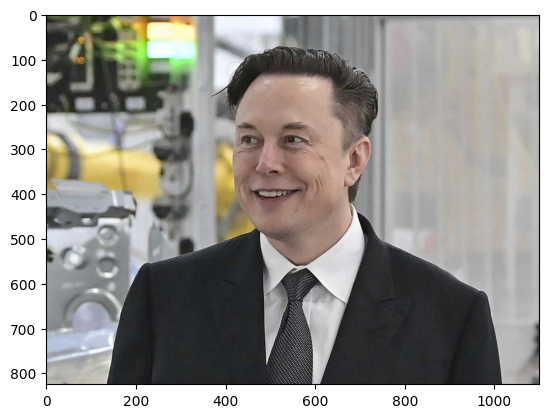

1/1 [==============================] - 0s 49ms/step
[[0.5164697  0.48353022]]


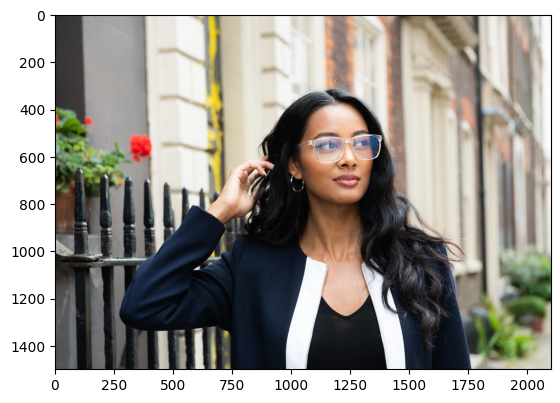

with glasses!


In [64]:
import cv2
import numpy as np
from google.colab import files
file_to_predict = files.upload()
for file_ in file_to_predict:
    image_to_predict = cv2.imread(file_,cv2.IMREAD_COLOR)
    plt.imshow(cv2.cvtColor(image_to_predict, cv2.COLOR_BGR2RGB))
    plt.show()
    img_to_predict = np.expand_dims(cv2.resize(image_to_predict,(200,200)), axis=0)
    res = model.predict(img_to_predict)
    print(model.predict(img_to_predict))
if np.any(res > 0.5):
    plt.imshow(cv2.cvtColor(image_glasses, cv2.COLOR_BGR2RGB))
    plt.show()
    print("with glasses!")
else:
    plt.imshow(cv2.cvtColor(image_withoutGlasses, cv2.COLOR_BGR2RGB))
    plt.show()
    print("without glasses!")

In [61]:
print(res.shape)

(1, 2)
